In [50]:
# import dependencies
from pprint import pprint
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load amzn data and format
amzn_raw_df = pd.read_csv('Resources/amzn_stock_data_raw.csv')
amzn_df = amzn_raw_df[['t','n','v','vw','o','c','h','l']].rename(columns={'v':'volume',\
                                                            'vw':'volume weighted average price',\
                                                            'o':'open', 'c':'close',\
                                                            'h':'high', 'l':'low',\
                                                            't':'Date','n':'transaction count'})
amzn_df.sort_values('Date', ascending=True, inplace=True)
amzn_df['Date'] = pd.to_datetime(amzn_df['Date'], origin='unix', unit='ms').dt.date

# displaying amzn_df
amzn_df.head()

# checking date type
# date_type = type(amzn_df['Date'][0])
# print(f'date column value are in format: {date_type}.')

,Date,transaction count,volume,volume weighted average price,open,close,high,low
0,2020-01-02,102920,4035910.0,1882.8283,1875.00,1898.01,1898.0100,1864.1500
1,2020-01-03,99633,3766604.0,1875.4284,1864.50,1874.97,1886.1965,1864.5000
2,2020-01-06,104160,4065698.0,1891.9954,1860.00,1902.88,1903.6900,1860.0000
3,2020-01-07,98636,4134010.0,1903.2183,1904.50,1906.86,1913.8900,1892.0433
4,2020-01-08,95706,3511966.0,1900.4983,1898.04,1891.97,1910.9999,1886.4448


In [4]:
# load covid data
us_covid_raw_df = pd.read_csv('../Covid/US_covid.csv')

# checking date format
# print(type(us_covid_raw_df.loc[0,'Date']))
# print(us_covid_raw_df.dtypes)

# changing date format
# us_covid_raw_df['Date'] = pd.to_datetime(us_covid_raw_df['Date'])
# us_covid_raw_df['Date'] = us_covid_raw_df['Date'].dt.strftime('%Y-%m-%d')
us_covid_raw_df['Date'] = pd.to_datetime(us_covid_raw_df['Date']).dt.date

# checking date type again
# print(type(us_covid_raw_df.loc[0,'Date']))
# print(us_covid_raw_df.dtypes)
# print(amzn_df.dtypes)

us_covid_raw_df.sort_values('Date', ascending=True)

us_covid_raw_df.head()
# us_covid_raw_df.tail()


,Date,Country,New Cases,Cumulative Cases,New Deaths,Cumulative Deaths
0,2020-01-03,United States of America,0,0,0,0
1,2020-01-04,United States of America,0,0,0,0
2,2020-01-05,United States of America,0,0,0,0
3,2020-01-06,United States of America,0,0,0,0
4,2020-01-07,United States of America,0,0,0,0


In [5]:
# us_covid_raw_df.to_csv('test/covid.csv')
# amzn_df.to_csv('test/amzn.csv')

In [6]:
# drop date rows where there are no new reported cases (non-reporting days)
us_covid_df = us_covid_raw_df.loc[us_covid_raw_df['New Cases'] != 0]

us_covid_df.head()

,Date,Country,New Cases,Cumulative Cases,New Deaths,Cumulative Deaths
17,2020-01-20,United States of America,1,1,0,0
22,2020-01-25,United States of America,8,9,0,0
28,2020-01-31,United States of America,7,16,0,0
35,2020-02-07,United States of America,10,26,0,0
42,2020-02-14,United States of America,10,36,0,0


In [7]:
# covidraw index 0 is 2022-01-03
print(us_covid_raw_df.iloc[0,0])
print(type(us_covid_raw_df.iloc[0,0]))

# amzn index 1 is 2022-01-03
print(amzn_df.iloc[1,0])
print(type(amzn_df.iloc[1,0]))


2020-01-03
<class 'datetime.date'>
2020-01-03
<class 'datetime.date'>


In [44]:
# merging data on date
all_dates_df = pd.merge(us_covid_raw_df, amzn_df, how='inner', on='Date')
# all_dates_df.to_csv('Resources/all_dates_combined.csv')
all_dates_df.head()

,Date,Country,New Cases,Cumulative Cases,New Deaths,Cumulative Deaths,transaction count,volume,volume weighted average price,open,close,high,low
0,2020-01-03,United States of America,0,0,0,0,99633,3766604.0,1875.4284,1864.50,1874.97,1886.1965,1864.5000
1,2020-01-06,United States of America,0,0,0,0,104160,4065698.0,1891.9954,1860.00,1902.88,1903.6900,1860.0000
2,2020-01-07,United States of America,0,0,0,0,98636,4134010.0,1903.2183,1904.50,1906.86,1913.8900,1892.0433
3,2020-01-08,United States of America,0,0,0,0,95706,3511966.0,1900.4983,1898.04,1891.97,1910.9999,1886.4448
4,2020-01-09,United States of America,0,0,0,0,84377,3174962.0,1906.0261,1909.89,1901.05,1917.8200,1895.8038


In [45]:
# creating new columns for mean stock data values

# for index,value in all_dates_df.iterrows():
#     all_dates_df

In [46]:
# adding columns for 1 month to 12 month stock performance offsets, accounting for the lag of stock parameters changing due to covid parameters
# this is useful becuase news agencies couldn't report covid stats instantaneously. There had to be some lag
# also will add 1 week, 2 week, and 3 week lag columns
all_dates_df["1_week_future_vol"] = pd.Series([], dtype=float)
all_dates_df["2_week_future_vol"] = pd.Series([], dtype=float)
all_dates_df["3_week_future_vol"] = pd.Series([], dtype=float)
all_dates_df["1_month_future_vol"] = pd.Series([], dtype=float)
all_dates_df["2_month_future_vol"] = pd.Series([], dtype=float)
all_dates_df["3_month_future_vol"] = pd.Series([], dtype=float)
all_dates_df["4_month_future_vol"] = pd.Series([], dtype=float)
all_dates_df["5_month_future_vol"] = pd.Series([], dtype=float)
all_dates_df["6_month_future_vol"] = pd.Series([], dtype=float)
all_dates_df["7_month_future_vol"] = pd.Series([], dtype=float)
all_dates_df["8_month_future_vol"] = pd.Series([], dtype=float)
all_dates_df["9_month_future_vol"] = pd.Series([], dtype=float)
all_dates_df["10_month_future_vol"] = pd.Series([], dtype=float)
all_dates_df["11_month_future_vol"] = pd.Series([], dtype=float)
all_dates_df["12_month_future_vol"] = pd.Series([], dtype=float)

In [47]:


offset_list = [5,10,15,22,44,66,88,110,132,154,176,198,220,242,264]
start_column = 13

for index, value in all_dates_df.iterrows():
    try:
        for offset in offset_list:
            all_dates_df.iloc[index,start_column+offset_list.index(offset)] = all_dates_df.iloc[index+offset,7]
            # print(all_dates_df.iloc[index+offset_list.index(offset),7])
            # print(offset_list.index(offset))
    except:
        pass

all_dates_df

,Date,Country,New Cases,Cumulative Cases,New Deaths,Cumulative Deaths,transaction count,volume,volume weighted average price,open,...,3_month_future_vol,4_month_future_vol,5_month_future_vol,6_month_future_vol,7_month_future_vol,8_month_future_vol,9_month_future_vol,10_month_future_vol,11_month_future_vol,12_month_future_vol
0,2020-01-03,United States of America,0,0,0,0,99633,3766604.0,1875.4284,1864.50,...,3977313.0,3259231.0,5798444.0,7231933.0,3149043.0,4021535.0,5223448.0,3808676.0,3474347.0,4941851.0
1,2020-01-06,United States of America,0,0,0,0,104160,4065698.0,1891.9954,1860.00,...,4655617.0,3074916.0,5436127.0,5788874.0,2751723.0,4527559.0,6439853.0,3444735.0,5995713.0,2821914.0
2,2020-01-07,United States of America,0,0,0,0,98636,4134010.0,1903.2183,1904.50,...,6716709.0,4782919.0,3873335.0,6394192.0,2691237.0,6449039.0,5220616.0,2916836.0,3836560.0,3749753.0
3,2020-01-08,United States of America,0,0,0,0,95706,3511966.0,1900.4983,1898.04,...,8086753.0,3648128.0,3595649.0,4688019.0,5345974.0,8891300.0,4503028.0,2997770.0,2381781.0,2955235.0
4,2020-01-09,United States of America,0,0,0,0,84377,3174962.0,1906.0261,1909.89,...,6866567.0,4234951.0,2959316.0,7596741.0,4185137.0,6114575.0,4591888.0,3346388.0,2093787.0,4660158.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,2021-12-27,United States of America,0,51284705,0,811439,198803,2942341.0,3409.6299,3420.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,2021-12-28,United States of America,0,51284705,0,811439,161457,2733628.0,3415.2458,3403.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,2021-12-29,United States of America,0,51284705,0,811439,131064,1787702.0,3387.5379,3416.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,2021-12-30,United States of America,0,51284705,0,811439,128162,1879155.0,3393.6641,3394.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# getting only dates with new reported cases/deaths
filtered_df = all_dates_df.loc[all_dates_df["New Cases"] != 0]
filtered_df

,Date,Country,New Cases,Cumulative Cases,New Deaths,Cumulative Deaths,transaction count,volume,volume weighted average price,open,...,3_month_future_vol,4_month_future_vol,5_month_future_vol,6_month_future_vol,7_month_future_vol,8_month_future_vol,9_month_future_vol,10_month_future_vol,11_month_future_vol,12_month_future_vol
19,2020-01-31,United States of America,7,16,0,0,378587,15565783.0,2032.9560,2051.470,...,3117814.0,3970652.0,6387759.0,3167274.0,5330741.0,8361378.0,4358523.0,4155074.0,4223995.0,3033607.0
24,2020-02-07,United States of America,10,26,0,0,135486,5095347.0,2077.4163,2041.990,...,4782919.0,3873335.0,6394192.0,2691237.0,6449039.0,5220616.0,2916836.0,3836560.0,3749753.0,4533801.0
29,2020-02-14,United States of America,10,36,0,0,74726,2606169.0,2139.4129,2155.680,...,3998143.0,3208780.0,5656906.0,4666258.0,5529392.0,5900901.0,3774803.0,4865433.0,4158202.0,5461578.0
33,2020-02-21,United States of America,16,52,0,0,131586,4637440.0,2107.7886,2142.150,...,5056876.0,6450784.0,2972035.0,2881978.0,4896101.0,8396081.0,3127424.0,2655548.0,3598263.0,3012489.0
38,2020-02-28,United States of America,31,83,0,0,310386,9493797.0,1850.4402,1814.630,...,2670947.0,6880642.0,3930025.0,8717754.0,4304239.0,4617250.0,4100836.0,3484582.0,2335339.0,3118314.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,2021-11-26,United States of America,667618,47836016,8088,771852,172840,2991297.0,3546.1085,3602.095,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
484,2021-12-03,United States of America,614753,48450769,7211,779063,240106,4035550.0,3385.5491,3455.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489,2021-12-10,United States of America,842352,49293121,11209,790272,171862,3028406.0,3440.9434,3508.340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
494,2021-12-17,United States of America,837527,50130648,9580,799852,168582,4269858.0,3382.8987,3354.210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


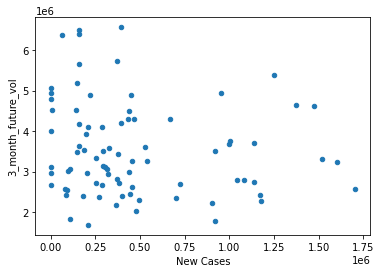

In [51]:
filtered_df.plot(kind='scatter', x='New Cases', y='3_month_future_vol')
plt.show()